In [68]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')





In [69]:
hd=pd.read_csv('heartdisease.csv')

In [70]:
hd.columns

Index(['63', '1', '4', '140', '260', '0', '1.1', '112', '1.2', '3', '2', 'NaN',
       'NaN.1', '2.1'],
      dtype='object')

In [71]:
hd

,63,1,4,140,260,0,1.1,112,1.2,3,2,NaN,NaN.1,2.1
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [72]:
hd.dtypes

63         int64
1          int64
4          int64
140      float64
260      float64
0        float64
1.1        int64
112      float64
1.2      float64
3        float64
2        float64
NaN      float64
NaN.1    float64
2.1        int64
dtype: object

In [73]:
hd.shape

(199, 14)

In [74]:
hd.columns

Index(['63', '1', '4', '140', '260', '0', '1.1', '112', '1.2', '3', '2', 'NaN',
       'NaN.1', '2.1'],
      dtype='object')

In [75]:
hd.rename(columns={'63':'age','1':'sex','4':'cp','140':'trestbps','260':'chol','0':'fbs','1.1':'restecg','112':'thalach','1.2':'exang','3':'oldpeak','2':'slope','?':'ca','?.1':'thal','2.1':'num'},inplace=True)
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'NaN', 'NaN.1', 'num'],
      dtype='object')

In [76]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,NaN,NaN.1,num
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [77]:
hd.drop(labels=['NaN','NaN.1'],axis=1,inplace=True)
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,0


In [78]:
hd.dropna(inplace=True)

In [79]:
hd['num'].value_counts()

1    26
3    20
2    20
0    15
4     5
Name: num, dtype: int64

In [80]:
x=hd.iloc[ : ,0:11]

In [81]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0
6,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...
183,57,1,4,130.0,207.0,0.0,1,96.0,1.0,1.0,2.0
187,74,1,4,155.0,310.0,0.0,0,112.0,1.0,1.5,3.0
189,51,0,4,114.0,258.0,1.0,2,96.0,0.0,1.0,1.0
190,62,1,4,160.0,254.0,1.0,1,108.0,1.0,3.0,2.0


In [82]:
y=hd.iloc[ : , 11:12]

In [83]:
y

,num
1,2
2,1
3,0
4,0
6,0
...,...
183,0
187,2
189,0
190,4


In [84]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,59.848837,0.965116,3.697674,133.523256,177.372093,0.313953,0.627907,124.767442,0.755814,1.760465,2.116279,1.697674
std,7.521760,0.184561,0.704102,22.615833,117.663733,0.466820,0.686792,20.186585,0.432123,0.939622,0.658315,1.178930
min,37.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,56.000000,1.000000,4.000000,120.500000,0.000000,0.000000,0.000000,110.500000,1.000000,1.000000,2.000000,1.000000
50%,60.000000,1.000000,4.000000,130.000000,217.500000,0.000000,1.000000,123.000000,1.000000,1.500000,2.000000,2.000000
75%,64.000000,1.000000,4.000000,144.000000,257.500000,1.000000,1.000000,140.000000,1.000000,2.375000,3.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


In [85]:
print(x.shape)
print(y.shape)

(86, 11)
(86, 1)


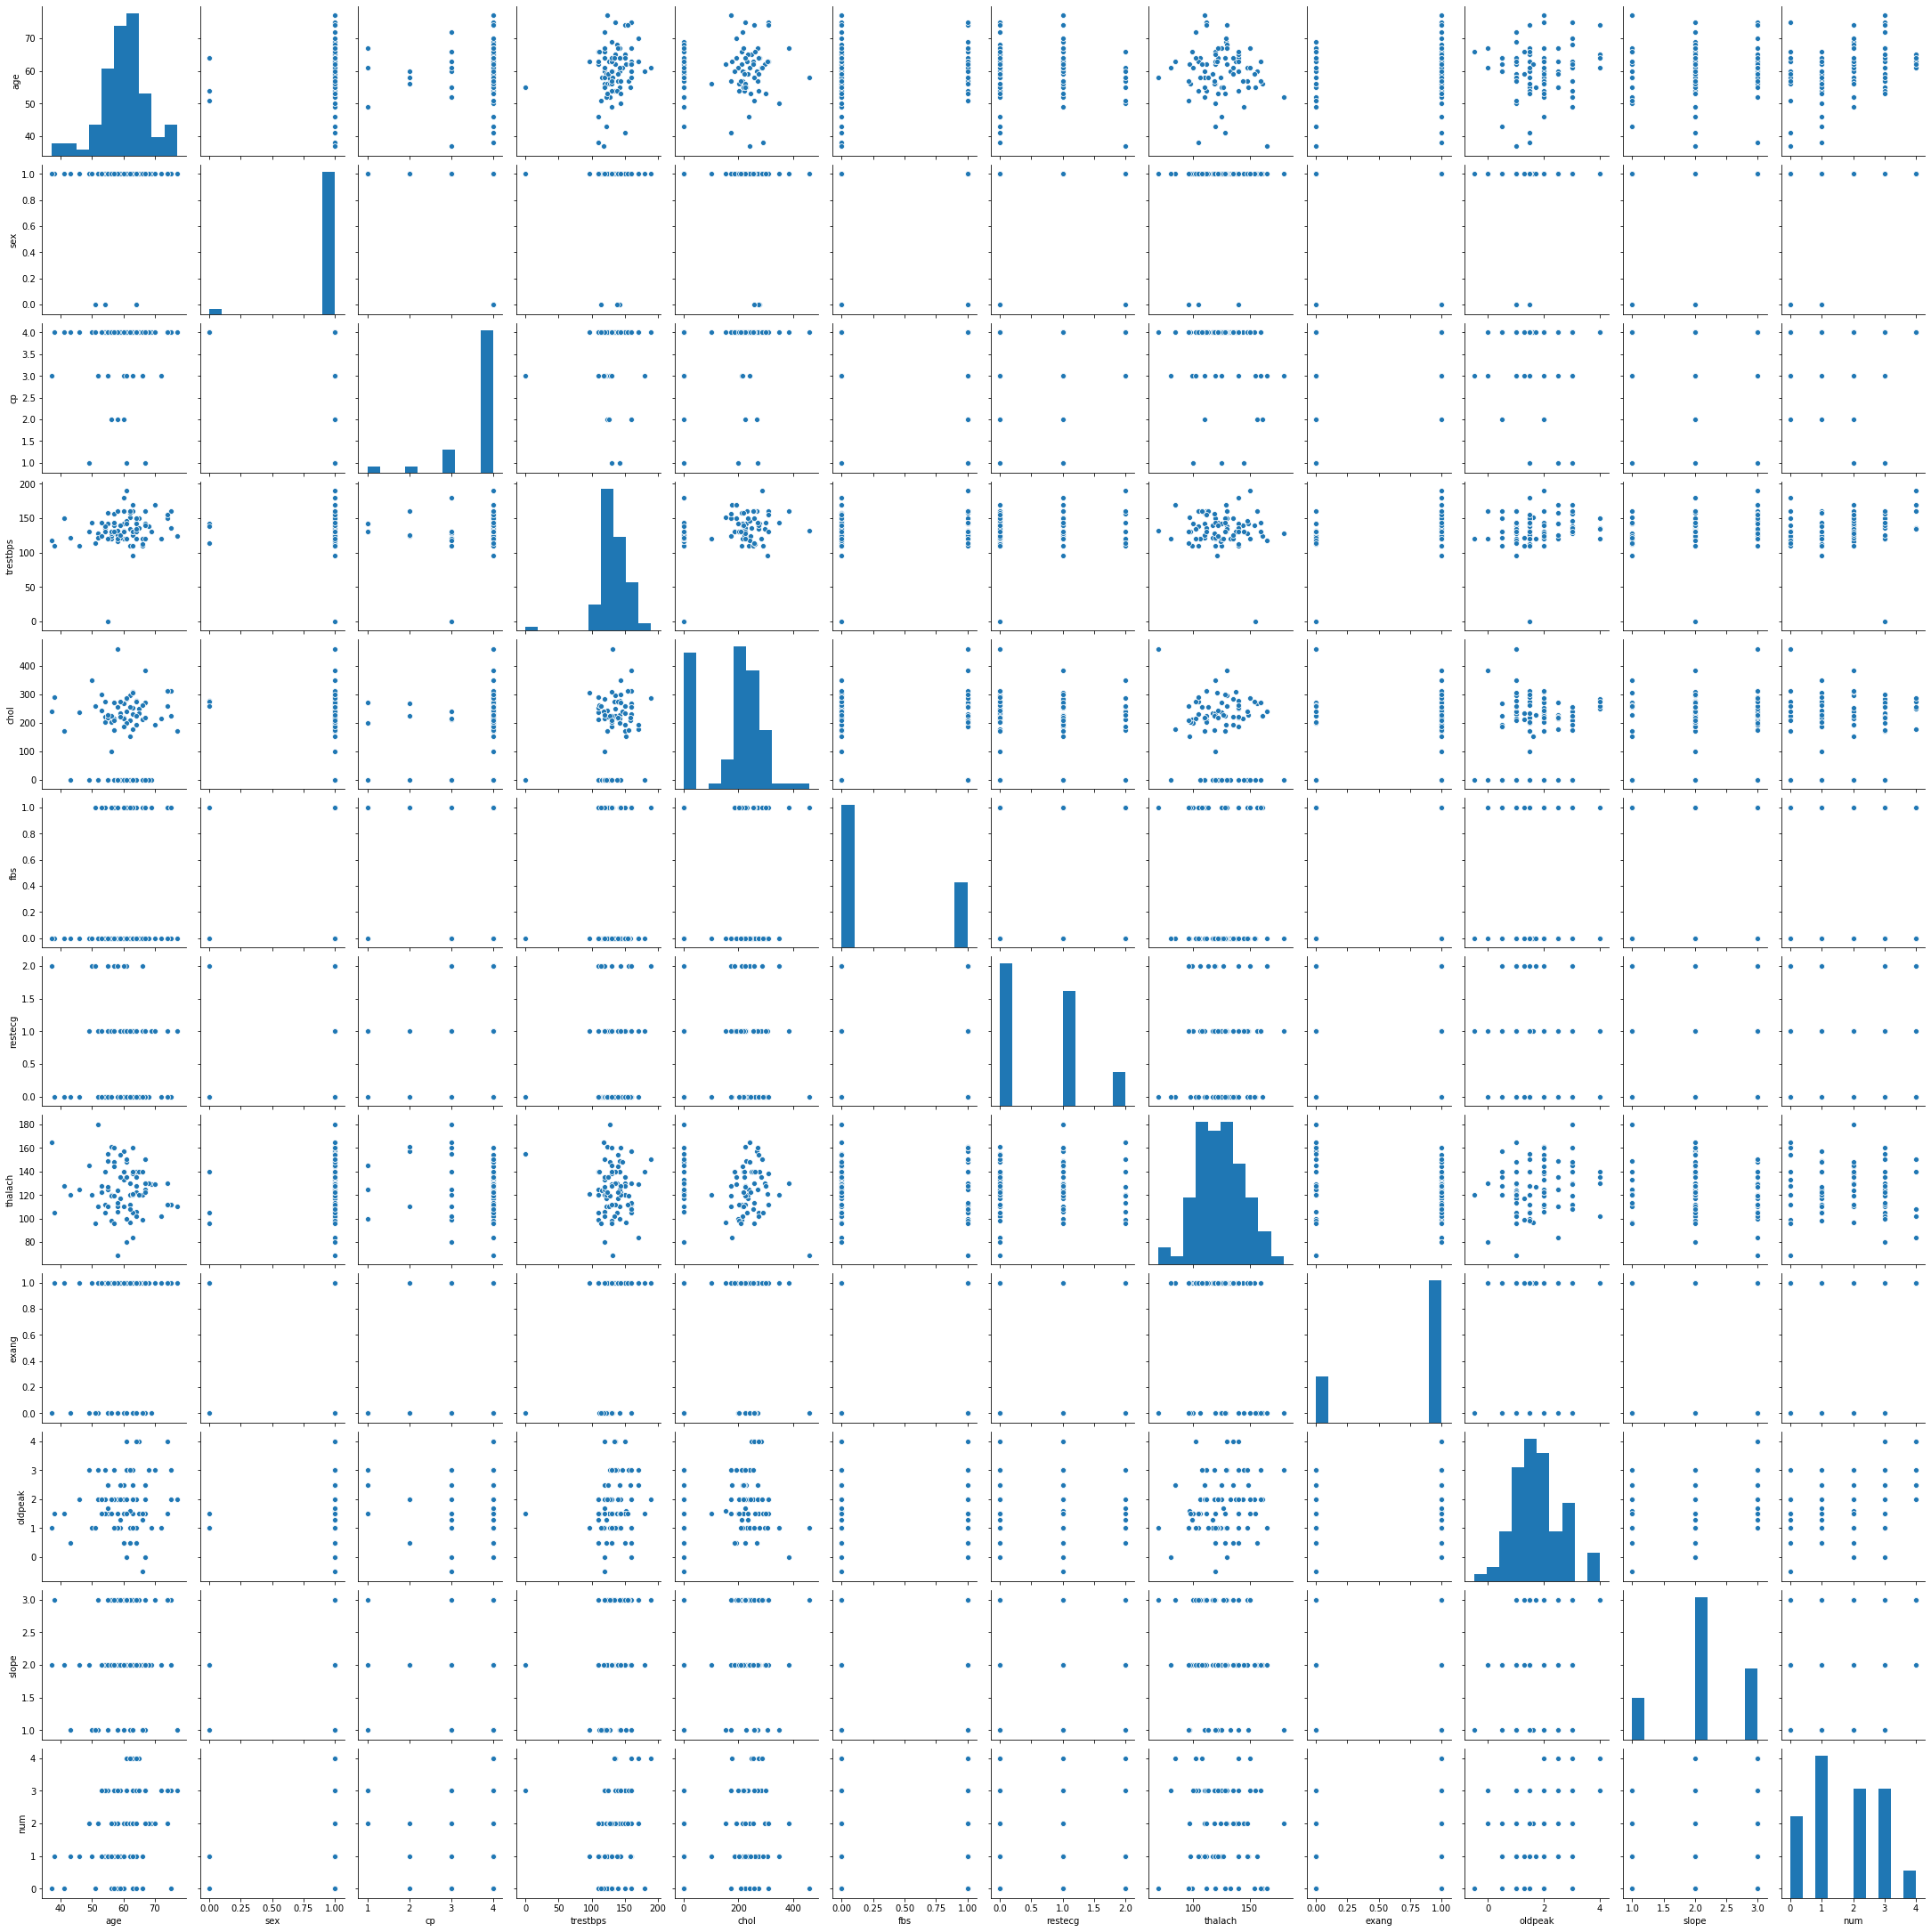

In [86]:
sns.pairplot(hd)


In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [88]:
x_train.shape

(60, 11)

In [89]:
x_test.shape

(26, 11)

In [90]:
y_train.shape

(60, 1)

In [91]:
y_test.shape

(26, 1)

In [92]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
0.38461538461538464
[[2 0 2 1 0]
 [2 4 1 3 0]
 [1 2 0 1 0]
 [0 0 2 3 0]
 [0 1 0 0 1]]
              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.57      0.40      0.47        10
           2       0.00      0.00      0.00         4
           3       0.38      0.60      0.46         5
           4       1.00      0.50      0.67         2

    accuracy                           0.38        26
   macro avg       0.47      0.38      0.40        26
weighted avg       0.45      0.38      0.40        26



In [93]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    print(svc.score(x_train,y_train))
    svcpred=svc.predict(x_test)
    print(accuracy_score(y_test,svcpred))
    print(confusion_matrix(y_test,svcpred))
    print(classification_report(y_test,svcpred))



In [94]:
svmkernel('rbf')

0.3
0.34615384615384615
[[0 4 1 0 0]
 [0 7 3 0 0]
 [0 2 2 0 0]
 [0 4 1 0 0]
 [0 2 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.37      0.70      0.48        10
           2       0.29      0.50      0.36         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.35        26
   macro avg       0.13      0.24      0.17        26
weighted avg       0.19      0.35      0.24        26



In [95]:
svmkernel('poly')

0.31666666666666665
0.3076923076923077
[[0 3 2 0 0]
 [0 7 3 0 0]
 [0 3 1 0 0]
 [0 2 3 0 0]
 [0 0 2 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.47      0.70      0.56        10
           2       0.09      0.25      0.13         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.31        26
   macro avg       0.11      0.19      0.14        26
weighted avg       0.19      0.31      0.24        26



In [96]:
svmkernel('linear')

0.6833333333333333
0.3076923076923077
[[0 2 3 0 0]
 [2 5 3 0 0]
 [0 3 1 0 0]
 [1 0 3 1 0]
 [0 0 1 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.50      0.50        10
           2       0.09      0.25      0.13         4
           3       1.00      0.20      0.33         5
           4       1.00      0.50      0.67         2

    accuracy                           0.31        26
   macro avg       0.52      0.29      0.33        26
weighted avg       0.48      0.31      0.33        26



In [97]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))


0.38333333333333336
0.038461538461538464
[[0 2 2 1 0]
 [5 0 1 4 0]
 [1 1 0 2 0]
 [2 2 0 1 0]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         4
           3       0.11      0.20      0.14         5
           4       0.00      0.00      0.00         2

    accuracy                           0.04        26
   macro avg       0.02      0.04      0.03        26
weighted avg       0.02      0.04      0.03        26



In [98]:
from sklearn.model_selection import cross_val_score
sv=SVC()
score=cross_val_score(sv,x,y,cv=5)

print(score)
print(score.mean())
print(score.std())



[0.33333333 0.29411765 0.29411765 0.29411765 0.29411765]
0.3019607843137255
0.01568627450980391


In [99]:
dt=DecisionTreeClassifier()
score=cross_val_score(dt,x,y,cv=5)

print(score)
print(score.mean())
print(score.std())



[0.16666667 0.35294118 0.29411765 0.17647059 0.29411765]
0.25686274509803925
0.07294539308916971


In [100]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.38461538461538464
[[2 0 2 1 0]
 [3 5 2 0 0]
 [0 1 2 1 0]
 [2 0 1 1 1]
 [0 0 1 1 0]]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.83      0.50      0.62        10
           2       0.25      0.50      0.33         4
           3       0.25      0.20      0.22         5
           4       0.00      0.00      0.00         2

    accuracy                           0.38        26
   macro avg       0.32      0.32      0.30        26
weighted avg       0.46      0.38      0.40        26



In [101]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.4230769230769231
[[1 2 0 0 2]
 [1 8 0 0 1]
 [0 3 0 1 0]
 [1 2 0 1 1]
 [0 1 0 0 1]]
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.50      0.80      0.62        10
           2       0.00      0.00      0.00         4
           3       0.50      0.20      0.29         5
           4       0.20      0.50      0.29         2

    accuracy                           0.42        26
   macro avg       0.31      0.34      0.29        26
weighted avg       0.37      0.42      0.36        26



In [102]:
from sklearn.svm import SVC
svc=SVC()
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.34615384615384615
[[0 4 1 0 0]
 [0 7 3 0 0]
 [0 2 2 0 0]
 [0 4 1 0 0]
 [0 2 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.37      0.70      0.48        10
           2       0.29      0.50      0.36         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.35        26
   macro avg       0.13      0.24      0.17        26
weighted avg       0.19      0.35      0.24        26



In [103]:
from sklearn.svm import SVC
svc=SVC(probability=True,kernel='linear')
ad=AdaBoostClassifier(n_estimators=5,base_estimator=svc)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.3076923076923077
[[0 3 1 1 0]
 [0 7 2 1 0]
 [0 2 1 1 0]
 [0 1 4 0 0]
 [0 0 2 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.54      0.70      0.61        10
           2       0.10      0.25      0.14         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.31        26
   macro avg       0.13      0.19      0.15        26
weighted avg       0.22      0.31      0.26        26



In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.5384615384615384
[[2 0 1 2 0]
 [1 7 2 0 0]
 [0 1 2 1 0]
 [1 0 2 1 1]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.88      0.70      0.78        10
           2       0.29      0.50      0.36         4
           3       0.25      0.20      0.22         5
           4       0.67      1.00      0.80         2

    accuracy                           0.54        26
   macro avg       0.52      0.56      0.52        26
weighted avg       0.58      0.54      0.54        26



In [105]:
# accuracy score of gradient boost classsifier is more than other classifiers. therefore saving the gb model

In [106]:
from sklearn.externals import joblib

joblib.dump(gb,'gbfile.obj')  
gb_joblib=joblib.load('gbfile.obj') 

predict=gb_joblib.predict(x_test)
predict



array([1, 1, 1, 2, 1, 3, 0, 2, 2, 3, 1, 1, 0, 2, 1, 3, 1, 4, 3, 2, 4, 0,
       2, 2, 0, 4], dtype=int64)